In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/load_forecast_data/training_data - Week 21, May 2019.csv')

In [ ]:
df.head(30)

,datetime,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,DEMAND
0,2015-01-31 01:00:00,962.2865,906.9580,970.3450,938.004850,1,1,0,0,1,25.308496,954.2018
1,2015-01-31 02:00:00,933.3221,863.5135,912.1755,900.284075,1,1,0,0,2,25.141443,913.8660
2,2015-01-31 03:00:00,903.9817,848.4447,900.2688,881.704325,1,1,0,0,3,25.006738,903.3637
3,2015-01-31 04:00:00,900.9995,839.8821,889.9538,876.458825,1,1,0,0,4,24.899713,889.0806
4,2015-01-31 05:00:00,904.3481,847.1073,893.6865,879.190775,1,1,0,0,5,24.821558,910.1472
5,2015-01-31 06:00:00,912.5080,848.4718,879.2323,877.027925,1,1,0,0,6,24.830194,922.1737
6,2015-01-31 07:00:00,927.5976,897.8229,932.4876,920.381925,1,1,0,0,7,25.799951,939.9442
7,2015-01-31 08:00:00,1075.3486,1021.6720,1048.9720,1057.194625,1,1,0,0,8,26.980310,1077.8575
8,2015-01-31 09:00:00,1116.6425,1108.9439,1167.9074,1138.178750,1,1,0,0,9,28.031824,1179.6601
9,2015-01-31 10:00:00,1121.9048,1165.4756,1257.5069,1189.291375,1,1,0,0,10,28.906061,1255.1569


In [ ]:
df.shape

(37728, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37728 entries, 0 to 37727
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    37728 non-null  object 
 1   week_X-2    37728 non-null  float64
 2   week_X-3    37728 non-null  float64
 3   week_X-4    37728 non-null  float64
 4   MA_X-4      37728 non-null  float64
 5   dayOfWeek   37728 non-null  int64  
 6   weekend     37728 non-null  int64  
 7   holiday     37728 non-null  int64  
 8   Holiday_ID  37728 non-null  int64  
 9   hourOfDay   37728 non-null  int64  
 10  T2M_toc     37728 non-null  float64
 11  DEMAND      37728 non-null  float64
dtypes: float64(6), int64(5), object(1)
memory usage: 3.5+ MB


In [ ]:
## converting date column into datetime 
df['datetime']=pd.to_datetime(df['datetime'],infer_datetime_format=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd751f33d10>,
      dtype=object)

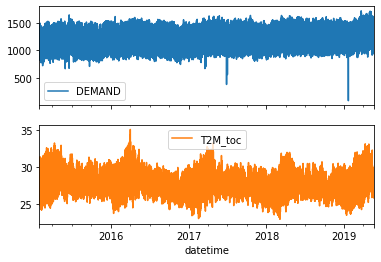

In [ ]:
df.set_index('datetime')[['DEMAND','T2M_toc']].plot(subplots=True)

In [ ]:
df.describe()

,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,DEMAND
count,37728.000000,37728.000000,37728.000000,37728.000000,37728.000000,37728.000000,37728.000000,37728.000000,37728.000000,37728.000000,37728.000000
mean,1175.417257,1174.493712,1173.507579,1174.760605,3.996289,0.286233,0.064885,0.723282,11.500000,27.377572,1176.992223
std,192.904280,192.608856,192.356014,184.931421,1.999652,0.452006,0.246327,3.174830,6.922278,1.695219,192.724815
min,85.192500,85.192500,85.192500,793.602650,1.000000,0.000000,0.000000,0.000000,0.000000,22.953455,85.192500
25%,1007.398325,1006.645700,1005.970875,1008.756267,2.000000,0.000000,0.000000,0.000000,5.750000,26.135728,1009.288050
50%,1163.553400,1162.506350,1161.581450,1168.809737,4.000000,0.000000,0.000000,0.000000,11.500000,27.095438,1165.171050
75%,1322.229025,1321.206225,1320.065125,1313.959094,6.000000,1.000000,0.000000,0.000000,17.250000,28.533846,1323.893925
max,1719.043900,1719.043900,1719.043900,1651.254750,7.000000,1.000000,1.000000,22.000000,23.000000,35.039575,1719.043900


In [ ]:
#Variables for training
cols = list(df)[1:]
print(cols)

['week_X-2', 'week_X-3', 'week_X-4', 'MA_X-4', 'dayOfWeek', 'weekend', 'holiday', 'Holiday_ID', 'hourOfDay', 'T2M_toc', 'DEMAND']


In [ ]:
model_datetime=df['datetime']

In [ ]:
train_df=df[cols].astype(float)

In [ ]:
train_df=train_df[:36720:]

In [ ]:
train_df

,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,DEMAND
0,962.2865,906.9580,970.3450,938.004850,1.0,1.0,0.0,0.0,1.0,25.308496,954.2018
1,933.3221,863.5135,912.1755,900.284075,1.0,1.0,0.0,0.0,2.0,25.141443,913.8660
2,903.9817,848.4447,900.2688,881.704325,1.0,1.0,0.0,0.0,3.0,25.006738,903.3637
3,900.9995,839.8821,889.9538,876.458825,1.0,1.0,0.0,0.0,4.0,24.899713,889.0806
4,904.3481,847.1073,893.6865,879.190775,1.0,1.0,0.0,0.0,5.0,24.821558,910.1472
...,...,...,...,...,...,...,...,...,...,...,...
36715,1362.1477,1376.6220,1335.4711,1360.112475,4.0,0.0,0.0,0.0,20.0,29.044763,1397.5788
36716,1330.7467,1338.3879,1305.3631,1332.959900,4.0,0.0,0.0,0.0,21.0,28.539545,1350.5093
36717,1275.5550,1281.6932,1240.1208,1279.486450,4.0,0.0,0.0,0.0,22.0,28.163232,1308.7955
36718,1200.3537,1209.2950,1165.0237,1199.699525,4.0,0.0,0.0,0.0,23.0,27.830194,1232.4521


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36720 entries, 0 to 36719
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   week_X-2    36720 non-null  float64
 1   week_X-3    36720 non-null  float64
 2   week_X-4    36720 non-null  float64
 3   MA_X-4      36720 non-null  float64
 4   dayOfWeek   36720 non-null  float64
 5   weekend     36720 non-null  float64
 6   holiday     36720 non-null  float64
 7   Holiday_ID  36720 non-null  float64
 8   hourOfDay   36720 non-null  float64
 9   T2M_toc     36720 non-null  float64
 10  DEMAND      36720 non-null  float64
dtypes: float64(11)
memory usage: 3.1 MB


In [ ]:
scaler=StandardScaler()
scaler=scaler.fit(train_df)
scaled_train_df=scaler.transform(train_df)

In [ ]:
scaled_train_df.shape

(36720, 11)

In [ ]:
def process(arr):
    ini_array1 = np.array(arr)
    result = ini_array1.flatten()
    return result

In [ ]:
def createdataset(dataset,timestep=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-timestep):
        a=dataset[i:(i+timestep),:]
        #process to convert 2-d datset to 1-d
        b=process(a)
        dataY.append(dataset[i+timestep,10])
        dataX.append(b)
    return np.array(dataX),np.array(dataY)
        

In [ ]:
timestep=168
X_train,Y_train=createdataset(scaled_train_df,timestep)

In [ ]:
X_train.shape

(36552, 1848)

In [ ]:
Y_train.shape

(36552,)

In [ ]:
scaled_train_df.shape

(36720, 11)

In [ ]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X_train,Y_train)

SVR()

In [ ]:
test_df=df[cols].astype(float)
test_df=test_df[36552:36889:]

In [ ]:
test_df.shape

(337, 11)

In [ ]:
scaled_test_df=scaler.transform(test_df)

In [ ]:
scaled_test_df

array([[-0.48225287, -0.56980791, -0.84223652, ..., -1.51686175,
        -1.09415901, -0.30857715],
       [-0.6301309 , -0.74852696, -1.00906129, ..., -1.37239873,
        -1.13986853, -0.53007801],
       [-0.75446822, -0.86556008, -1.14408532, ..., -1.2279357 ,
        -1.17837029, -0.63934165],
       ...,
       [ 0.26949701,  0.1498907 ,  0.20088751, ...,  1.66132477,
        -0.03211905,  0.48254197],
       [-0.04000792, -0.1571202 , -0.10875419, ..., -1.66132477,
        -0.13384264,  0.0443365 ],
       [-0.29916379, -0.39280034, -0.47492601, ..., -1.51686175,
        -0.26702322, -0.16158517]])

In [ ]:
timestep=168
X_test,Y_test=createdataset(scaled_test_df,timestep)

In [ ]:
X_test.shape

(169, 1848)

In [ ]:
prediction=regressor.predict(X_test)

In [ ]:
prediction.shape

(169,)

In [ ]:
repetitions = train_df.shape[1]

prediction_copies = np.transpose([prediction] * repetitions)

In [ ]:
prediction_copies.shape

(169, 11)

In [ ]:
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

In [ ]:
y_pred_future

array([1110.97005382, 1079.26233479, 1056.32838602, 1043.1773719 ,
       1052.41043145, 1053.55346523, 1179.08621433, 1343.76230572,
       1441.51390233, 1517.10342964, 1551.43667545, 1553.04097303,
       1570.71041455, 1571.39390592, 1539.38445089, 1465.99230221,
       1351.3307159 , 1337.23743899, 1385.51193737, 1352.13549889,
       1310.85398062, 1253.65146428, 1175.75109435, 1118.12504229,
       1078.0934485 , 1050.00439101, 1027.86347886, 1023.81509975,
       1040.88496751, 1050.27022457, 1179.28707367, 1341.62241249,
       1433.66280306, 1497.91757223, 1526.66720557, 1521.94119856,
       1537.41469125, 1542.4630028 , 1521.02669385, 1468.68230303,
       1375.54125809, 1368.79626323, 1414.07188735, 1381.18588265,
       1333.85586909, 1274.59113051, 1201.77055591, 1139.28423606,
       1098.25417641, 1071.4580513 , 1049.7187637 , 1040.1168257 ,
       1057.12588446, 1065.04144346, 1189.27801972, 1349.02772583,
       1448.10295002, 1524.99004879, 1562.92033306, 1565.33179

In [ ]:
forecast_period_dates=pd.date_range(list(df['datetime'])[36552],periods=169,freq='1H').tolist()

In [ ]:
forecast_period_dates

[Timestamp('2019-04-03 01:00:00', freq='H'),
 Timestamp('2019-04-03 02:00:00', freq='H'),
 Timestamp('2019-04-03 03:00:00', freq='H'),
 Timestamp('2019-04-03 04:00:00', freq='H'),
 Timestamp('2019-04-03 05:00:00', freq='H'),
 Timestamp('2019-04-03 06:00:00', freq='H'),
 Timestamp('2019-04-03 07:00:00', freq='H'),
 Timestamp('2019-04-03 08:00:00', freq='H'),
 Timestamp('2019-04-03 09:00:00', freq='H'),
 Timestamp('2019-04-03 10:00:00', freq='H'),
 Timestamp('2019-04-03 11:00:00', freq='H'),
 Timestamp('2019-04-03 12:00:00', freq='H'),
 Timestamp('2019-04-03 13:00:00', freq='H'),
 Timestamp('2019-04-03 14:00:00', freq='H'),
 Timestamp('2019-04-03 15:00:00', freq='H'),
 Timestamp('2019-04-03 16:00:00', freq='H'),
 Timestamp('2019-04-03 17:00:00', freq='H'),
 Timestamp('2019-04-03 18:00:00', freq='H'),
 Timestamp('2019-04-03 19:00:00', freq='H'),
 Timestamp('2019-04-03 20:00:00', freq='H'),
 Timestamp('2019-04-03 21:00:00', freq='H'),
 Timestamp('2019-04-03 22:00:00', freq='H'),
 Timestamp

In [ ]:
#timestamp to datetime
forecast_dates = []
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.to_pydatetime())

In [ ]:
forecast_dates

[datetime.datetime(2019, 4, 3, 1, 0),
 datetime.datetime(2019, 4, 3, 2, 0),
 datetime.datetime(2019, 4, 3, 3, 0),
 datetime.datetime(2019, 4, 3, 4, 0),
 datetime.datetime(2019, 4, 3, 5, 0),
 datetime.datetime(2019, 4, 3, 6, 0),
 datetime.datetime(2019, 4, 3, 7, 0),
 datetime.datetime(2019, 4, 3, 8, 0),
 datetime.datetime(2019, 4, 3, 9, 0),
 datetime.datetime(2019, 4, 3, 10, 0),
 datetime.datetime(2019, 4, 3, 11, 0),
 datetime.datetime(2019, 4, 3, 12, 0),
 datetime.datetime(2019, 4, 3, 13, 0),
 datetime.datetime(2019, 4, 3, 14, 0),
 datetime.datetime(2019, 4, 3, 15, 0),
 datetime.datetime(2019, 4, 3, 16, 0),
 datetime.datetime(2019, 4, 3, 17, 0),
 datetime.datetime(2019, 4, 3, 18, 0),
 datetime.datetime(2019, 4, 3, 19, 0),
 datetime.datetime(2019, 4, 3, 20, 0),
 datetime.datetime(2019, 4, 3, 21, 0),
 datetime.datetime(2019, 4, 3, 22, 0),
 datetime.datetime(2019, 4, 3, 23, 0),
 datetime.datetime(2019, 4, 4, 0, 0),
 datetime.datetime(2019, 4, 4, 1, 0),
 datetime.datetime(2019, 4, 4, 2, 0)

In [ ]:
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'DEMAND':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

In [ ]:
df_forecast

,Date,DEMAND
0,2019-04-03 01:00:00,1110.970054
1,2019-04-03 02:00:00,1079.262335
2,2019-04-03 03:00:00,1056.328386
3,2019-04-03 04:00:00,1043.177372
4,2019-04-03 05:00:00,1052.410431
...,...,...
164,2019-04-09 21:00:00,1349.083284
165,2019-04-09 22:00:00,1296.381553
166,2019-04-09 23:00:00,1229.753076
167,2019-04-10 00:00:00,1166.542550


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an exp

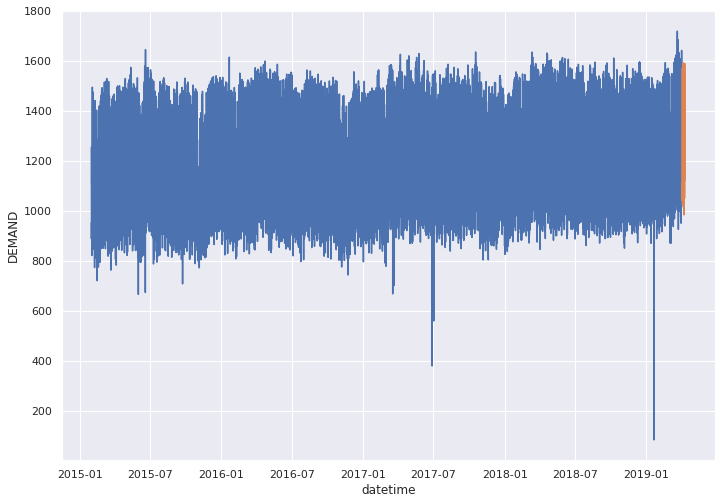

In [ ]:
original = df[['datetime', 'DEMAND']]

original['datetime']=pd.to_datetime(original['datetime'])
original = original.loc[original['datetime'] < '2019-04-03 01:00:00	']
original

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(original['datetime'], original['DEMAND'])
sns.lineplot(df_forecast['Date'], df_forecast['DEMAND'])

In [ ]:
Y_test

array([-0.35636405, -0.53061283, -0.65216912, -0.76110573, -0.6147095 ,
       -0.69527434, -0.07587101,  0.93329526,  1.48648706,  1.83091954,
        2.12353754,  2.07208134,  2.31264373,  2.29784829,  2.05803476,
        1.39335617,  0.82272346,  0.83554259,  1.11463373,  0.95161575,
        0.72624562,  0.40619688,  0.11394186, -0.26140163, -0.47365059,
       -0.6717108 , -0.82366254, -0.89247321, -0.78033286, -0.75504715,
       -0.1399094 ,  0.84308118,  1.37393375,  1.78244888,  1.95014749,
        2.00407524,  2.20104081,  2.27189392,  2.22937403,  1.8057333 ,
        1.18907699,  1.14526561,  1.34183331,  1.14561036,  0.96698871,
        0.64735243,  0.25249798, -0.08038395, -0.27291469, -0.47413386,
       -0.69056455, -0.7642626 , -0.58598049, -0.64655216, -0.14023852,
        0.92922861,  1.46310839,  1.9680722 ,  2.16415611,  2.17420635,
        2.46298787,  2.52956446,  2.28588686,  1.68742137,  1.09877646,
        1.15315675,  1.35227203,  1.18541237,  0.97601044,  0.73

In [ ]:
repetitions = train_df.shape[1]

actual_copies = np.transpose([Y_test] * repetitions)

In [ ]:
y_actual_future = scaler.inverse_transform(actual_copies)[:,0]

In [ ]:
y_actual_future

array([1104.01405611, 1070.57323453, 1047.24485295, 1026.33836791,
       1054.43388702, 1038.97234673, 1157.84466215, 1351.51803157,
       1457.68341045, 1523.7849057 , 1579.94246331, 1570.06728581,
       1616.23463258, 1613.395178  , 1567.37154795, 1439.81026764,
       1330.29772839, 1332.75790276, 1386.3194647 , 1355.03399412,
       1311.7822578 , 1250.3603508 , 1194.27245283, 1122.23869523,
       1081.50509969, 1043.4945262 , 1014.33282493, 1001.12707745,
       1022.64840619, 1027.50109413, 1145.55478393, 1334.20466438,
       1436.08282764, 1514.48269618, 1546.66644622, 1557.01594885,
       1594.81644407, 1608.41416442, 1600.2539931 , 1518.95130669,
       1400.60618577, 1392.19815809, 1429.92229756, 1392.26431975,
       1357.98428448, 1296.64153161, 1220.86334384, 1156.97856404,
       1120.02917561, 1081.41235343, 1039.87622295, 1025.73251899,
       1059.94739203, 1048.32282828, 1145.49162053, 1350.73758382,
       1453.19671042, 1550.10645279, 1587.73774607, 1589.66652

In [ ]:
#calculating MAPE
APE = []
  

for i in range(len(y_actual_future)-1):
  

    per_err = (y_actual_future[i] - y_pred_future[i]) / y_actual_future[i]

    per_err = abs(per_err)

    APE.append(per_err)
  

MAPE = sum(APE)/len(APE)

In [ ]:
MAPE

0.018657496197746794